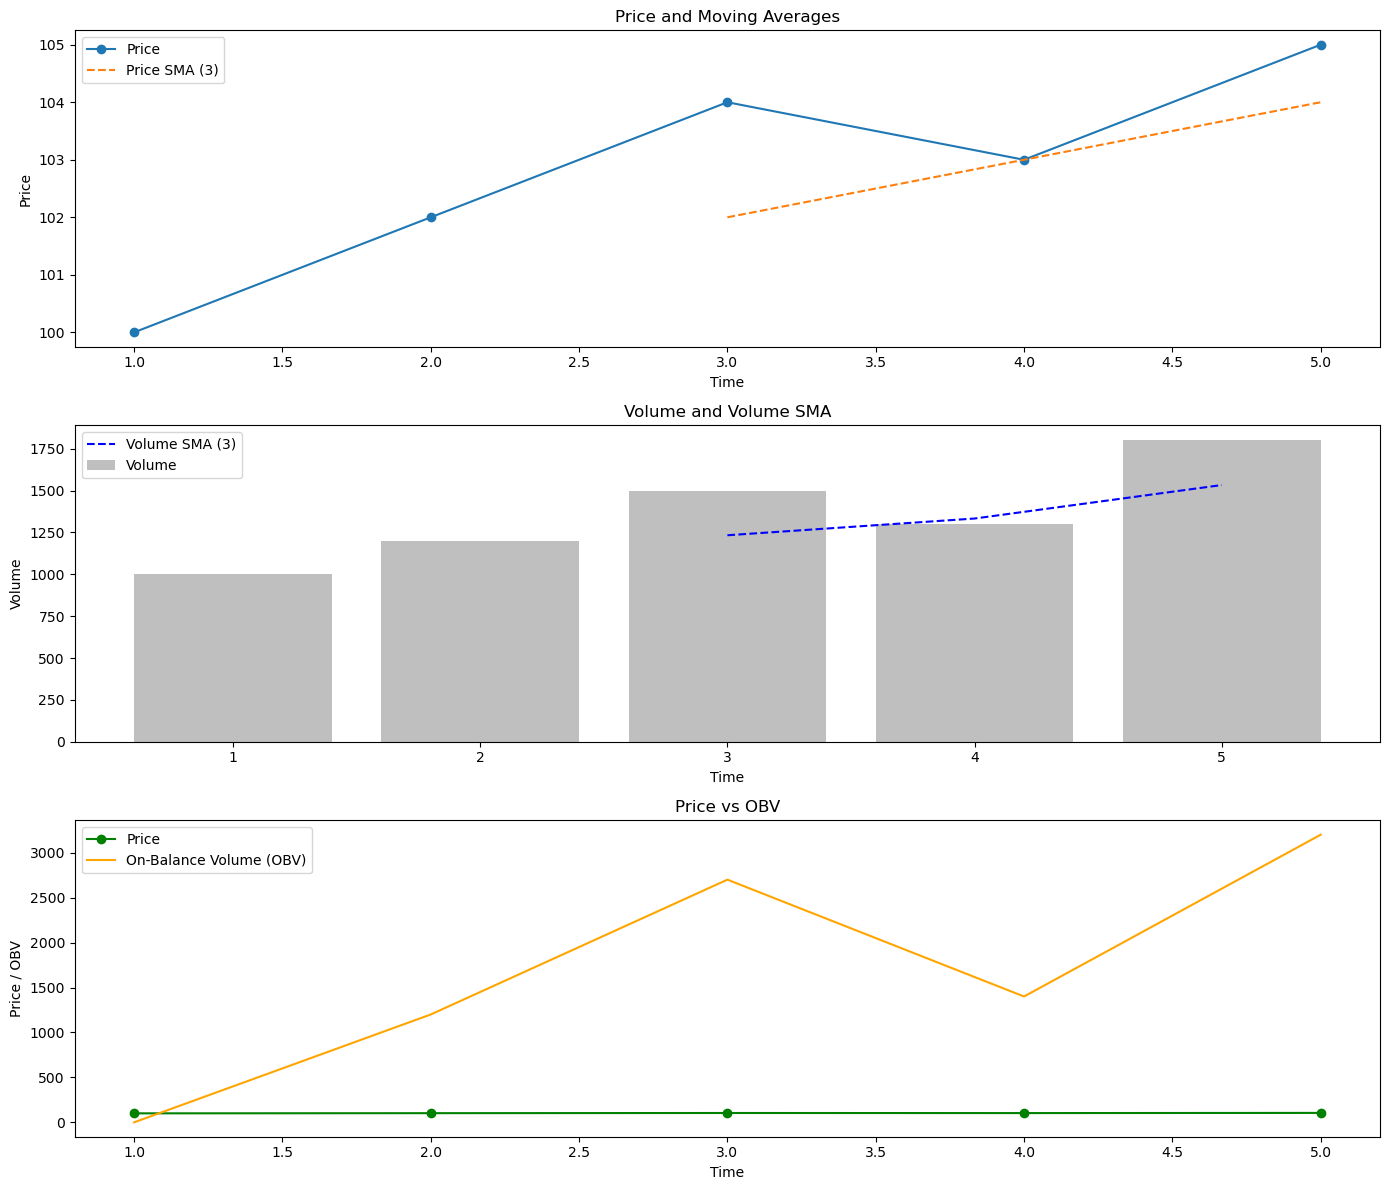

   Time  Price  Volume  Price_SMA   Volume_SMA   OBV
0     1    100    1000        NaN          NaN     0
1     2    102    1200        NaN          NaN  1200
2     3    104    1500      102.0  1233.333333  2700
3     4    103    1300      103.0  1333.333333  1400
4     5    105    1800      104.0  1533.333333  3200


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: prices and volumes over time
data = {
    'Time': [1, 2, 3, 4, 5],
    'Price': [100, 102, 104, 103, 105],
    'Volume': [1000, 1200, 1500, 1300, 1800]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Define moving average period
price_ma_period = 3
volume_ma_period = 3

# Calculate Simple Moving Average (SMA) for price and volume
df['Price_SMA'] = df['Price'].rolling(window=price_ma_period).mean()
df['Volume_SMA'] = df['Volume'].rolling(window=volume_ma_period).mean()

# Calculate On-Balance Volume (OBV)
df['OBV'] = 0
for i in range(1, len(df)):
    if df.loc[i, 'Price'] > df.loc[i - 1, 'Price']:
        df.loc[i, 'OBV'] = df.loc[i - 1, 'OBV'] + df.loc[i, 'Volume']
    elif df.loc[i, 'Price'] < df.loc[i - 1, 'Price']:
        df.loc[i, 'OBV'] = df.loc[i - 1, 'OBV'] - df.loc[i, 'Volume']
    else:
        df.loc[i, 'OBV'] = df.loc[i - 1, 'OBV']

# Plot the results
plt.figure(figsize=(14, 12))

# Plot price and Price SMA
plt.subplot(3, 1, 1)
plt.plot(df['Time'], df['Price'], label='Price', marker='o')
plt.plot(df['Time'], df['Price_SMA'], label=f'Price SMA ({price_ma_period})', linestyle='--')
plt.title('Price and Moving Averages')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Plot volume and Volume SMA
plt.subplot(3, 1, 2)
plt.bar(df['Time'], df['Volume'], label='Volume', alpha=0.5, color='gray')
plt.plot(df['Time'], df['Volume_SMA'], label=f'Volume SMA ({volume_ma_period})', color='blue', linestyle='--')
plt.title('Volume and Volume SMA')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()

# Plot Price vs OBV
plt.subplot(3, 1, 3)
plt.plot(df['Time'], df['Price'], label='Price', color='green', marker='o')
plt.plot(df['Time'], df['OBV'], label='On-Balance Volume (OBV)', color='orange')
plt.title('Price vs OBV')
plt.xlabel('Time')
plt.ylabel('Price / OBV')
plt.legend()

plt.tight_layout()
plt.show()

# Display DataFrame with calculations
print(df)
